# NetworkX API basics

In [4]:
#import networkx API
import networkx as nx

#initialize and empty graph
G = nx.Graph()

#add 1, 2 ,3 as nodes
G.add_nodes_from([1,2,3])

# see what nodes are present in the graph
G.nodes()

NodeView((1, 2, 3))

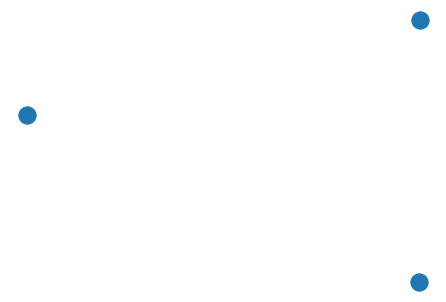

In [5]:
# Draw node link diagram graph
nx.draw(G)
import matplotlib.pyplot as plt
plt.show()

In [6]:
type(G)

networkx.classes.graph.Graph

In [7]:
#initialize and empty directed graph
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

In [8]:
#initialize and empty multi-edge(Directed) graph
M = nx.MultiGraph()
MD = nx.MultiDiGraph()
print(type(M))
print(type(MD))

<class 'networkx.classes.multigraph.MultiGraph'>
<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [9]:
#add an edge between the nodes 1 and 2
G.add_edge(1,2)

# view a list of tuples which represent the edges in which each tuple shows the nodes that are present on that edge.
G.edges()

EdgeView([(1, 2)])

In [10]:
# storing metadata in the graph
G.nodes[1]['label'] = 'blue'
G.nodes[2]['label'] = 'green'
G.nodes[3]['label'] = 'red'

# see what nodes are present in the graph with metadata
G.nodes(data = True)

NodeDataView({1: {'label': 'blue'}, 2: {'label': 'green'}, 3: {'label': 'red'}})

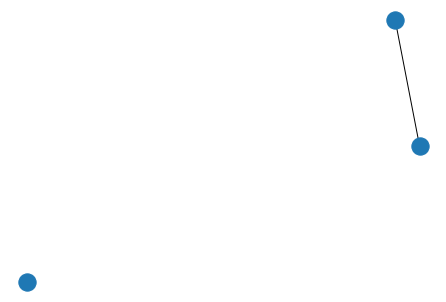

In [11]:
# Draw node link diagram graph
nx.draw(G)
import matplotlib.pyplot as plt
plt.show()

In [12]:
# find length of the graph
len(G.nodes)
# find the data structure
type(G.nodes())
# the data structure of the third element of the last edge listed in
list(G.edges(data=True))[-1]

(1, 2, {})

# Checking whether there are self-loops in the graph

In [ ]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# # Check whether number of self loops equals the number of nodes in self loops
# assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

## Task 1
Write a full graph of 20 nodes where from each node, there is a link to one to six other nodes, taken at random, of your choice. Use a labelling of your choice to label each node of the network.

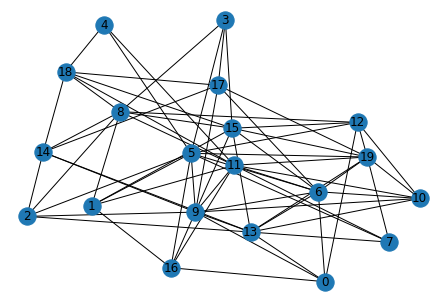

In [13]:
import random

#initialize an empty graph
G_1 = nx.Graph()

# Add 20 nodes with random labels
for i in range(20):
    G_1.add_node(i, label='Node {}'.format(i))

# Add random edges to each node
for node in G_1.nodes():
    num_edges = random.randint(1, 6)  # choose random number of edges
    for i in range(num_edges):
        neighbor = random.choice(list(G_1.nodes()))  # choose random neighbor
        while neighbor == node or G_1.has_edge(node, neighbor):
            neighbor = random.choice(list(G_1.nodes()))  # avoid self-loops and duplicates
        G_1.add_edge(node, neighbor)

# #add 20 nodes with metadata
# #G_1.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
# G.add_nodes_from([
#     (1, {"label": "one"}),
#     (2, {"label": "two"}),
#     (3, {"label": "three"}),
#     (4, {"label": "four"}),
#     (5, {"label": "five"}),
#     (6, {"label": "six"}),
#     (7, {"label": "seven"}),
#     (8, {"label": "eight"}),
#     (9, {"label": "nine"}),
#     (10, {"label": "ten"}),
#     (11, {"label": "eleven"}),
#     (12, {"label": "twelve"}),
#     (13, {"label": "thirteen"}),
#     (14, {"label": "forteen"}),
#     (15, {"label": "fifteen"}),
#     (16, {"label": "sixteen"}),
#     (17, {"label": "seventeen"}),
#     (18, {"label": "eightteen"}),
#     (19, {"label": "nineteen"}),
#     (20, {"label": "twenty"}),
# ])

# #link one to six other nodes at random
# G_1.add_edge(1,2)
# G_1.add_edge(1,8)
# G_1.add_edge(1,9)
# G_1.add_edge(1,15)
# G_1.add_edge(1,18)
# G_1.add_edge(1,20)

# # Adding a list of edges 
# G_1.add_edges_from([(2,3),(2,8),(2,11),(2,14),(2,17),(2,19)])

# Draw node link diagram graph
nx.draw(G_1, with_labels = True)
import matplotlib.pyplot as plt
plt.show()



In [ ]:
G_1.nodes(data=True)

## Adjacency matrix

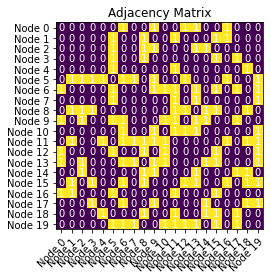

In [14]:
import numpy as np
# Create adjacency matrix
adj_matrix = nx.adjacency_matrix(G_1).todense()

# Create a dictionary of node labels
node_labels = {i: G_1.nodes[i]['label'] for i in range(len(G_1.nodes()))}

# Draw the matrix plot with node labels
fig, ax = plt.subplots()
im = ax.imshow(adj_matrix)

# Add tick labels
ax.set_xticks(np.arange(len(G_1.nodes())))
ax.set_yticks(np.arange(len(G_1.nodes())))
ax.set_xticklabels([node_labels[i] for i in range(len(G_1.nodes()))])
ax.set_yticklabels([node_labels[i] for i in range(len(G_1.nodes()))])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add text annotations
for i in range(len(G_1.nodes())):
    for j in range(len(G_1.nodes())):
        text = ax.text(j, i, adj_matrix[i, j], ha="center", va="center", color="w")

# Set title and show the plot
ax.set_title("Adjacency Matrix")
fig.tight_layout()
plt.show()

#### Calculate the degree of each node and the average degree of the graph  (use appropriate functions in  NetworkX) and display their values

In [ ]:
G_1.degree()

In [ ]:
# Calculate the degree of each node
node_degrees = dict(G_1.degree())
for node, degree in node_degrees.items():
    print("{}: {}".format(G_1.nodes[node]['label'], degree))

# Calculate the average degree of the graph
avg_degree = nx.average_degree_connectivity(G_1)
print("Average degree: {}".format(avg_degree))

In [ ]:
len(G_1.adj)

In [ ]:
# add Node attributes
G_1.nodes[1]['title'] = 'Red'
G_1.nodes[2]['title'] = 'Blue'
G_1.nodes[3]['title'] = 'Green'


G_1.nodes(data = True)

### Queries on a graph (example)
#Use a list comprehension to get the nodes of interest: noi'  
noi = [n for n, d in T.nodes(data = True) if d['occupation'] == 'scientist']


#Use a list comprehension to get the edges of interest: eoi'  
eoi = [(u, v) for u, v, d in T.edges(data =True) if d['date'] < date(2010, 1, 1)]

# Task 2

In [ ]:
import pickle
# Open the file for reading
with open('karate_club_coords.pkl', 'rb') as f:
    # Load the object from the file
    my_object = pickle.load(f, encoding='latin1')
# Use the object as needed
print(my_object)

# Arc plot

/Users/imak/opt/anaconda3/lib/python3.8/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


TypeError: draw() takes 0 positional arguments but 1 was given

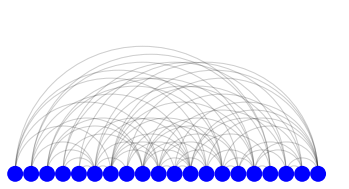

In [19]:
import nxviz as nv
#from nxviz.plots import ArcPlot

arc_plot = nv.ArcPlot(G_1)
arc_plot.draw()
plt.show()

In [26]:
# # Create the customized ArcPlot object: a2
# a2 = nv.ArcPlot(G_1, node_order = 'category', node_color = 'category')

# # Draw a2 to the screen
# a2.draw()

# # Display the plot
# plt.show()

# Circos plots

/Users/imak/opt/anaconda3/lib/python3.8/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


TypeError: draw() takes 0 positional arguments but 1 was given

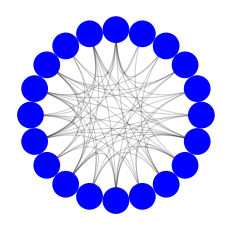

In [21]:
# Import necessary modules
#from nxviz.plots import CircosPlot

# Create the CircosPlot object: c
c = nv.CircosPlot(G_1)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

## Degree Centrality

#### Compute number of neighbors for each node

In [27]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

In [36]:
one_neighbor = nodes_with_m_nbrs(G_1, 6)
print(one_neighbor)

{10, 12, 14, 17, 18}


#### Compute degree distribution

In [37]:
# Compute the degree of every node: degrees
degrees = [len(list(G_1.neighbors(n))) for n in G_1.nodes()]

# Print the degrees
print(degrees)

[5, 5, 5, 4, 3, 10, 9, 4, 8, 9, 6, 10, 6, 9, 6, 9, 5, 6, 6, 9]


#### Degree centrality distribution

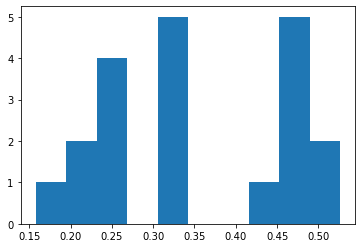

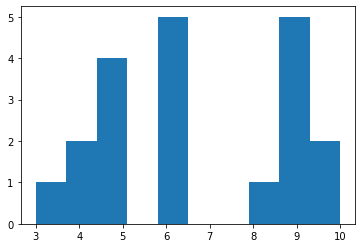

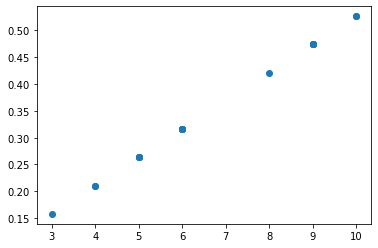

In [38]:
# Compute the degree centrality of the network: deg_cent
deg_cent = nx.degree_centrality(G_1)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()